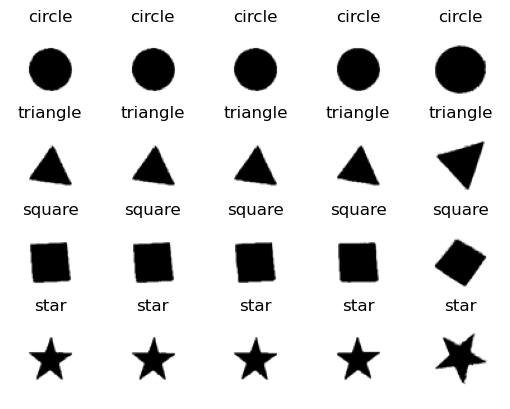

In [7]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set the parent folder path containing subfolders for each shape's dataset
parent_folder = 'C:\\Users\\Lucifer\\Desktop\\ML_project\\Lab2\\CS7324fall23\\lab2\\shape dataset\\shapes'

# Function to read and preprocess the images using Pillow
def preprocess_images(parent_folder, num_samples_per_shape=5):
    image_data = []
    image_labels = []
    
    for shape_folder in os.listdir(parent_folder):
        shape_folder_path = os.path.join(parent_folder, shape_folder)
        if os.path.isdir(shape_folder_path):
            shape_name = shape_folder.lower()  # Get the shape name from the folder
            sample_count = 0  # Counter for the number of samples per shape
            for image_file in os.listdir(shape_folder_path):
                if sample_count >= num_samples_per_shape:
                    break  # Limit the number of samples per shape
                if image_file.endswith(('.png')):  # You can add more image extensions if needed
                    image_path = os.path.join(shape_folder_path, image_file)
                    img = Image.open(image_path)
                    img = img.resize((64, 64))  # Resize images to a common size (adjust as needed)
                    img = img.convert('L')  # Convert to grayscale (optional)
                    img_flat = np.array(img).flatten()  # Linearize the image
                    image_data.append(img_flat)
                    image_labels.append(shape_name)
                    sample_count += 1
    
    return np.array(image_data), np.array(image_labels)

# Read and preprocess the images
image_data, image_labels = preprocess_images(parent_folder, num_samples_per_shape=5)

# Visualize images from all four shapes
shape_names = set(image_labels)
num_samples_to_show = 5  # Number of samples to show per shape

for shape_name in shape_names:
    samples_for_shape = image_data[image_labels == shape_name][:num_samples_to_show]
    
    for i, image in enumerate(samples_for_shape):
        plt.subplot(len(shape_names), num_samples_to_show, num_samples_to_show * list(shape_names).index(shape_name) + i + 1)
        plt.imshow(image.reshape(64, 64), cmap='gray')  # Reshape to original dimensions
        plt.title(shape_name)
        plt.axis('off')

plt.show()

# Now, image_data contains the flattened image features as a NumPy array, and image_labels contains the corresponding labels as a NumPy array.


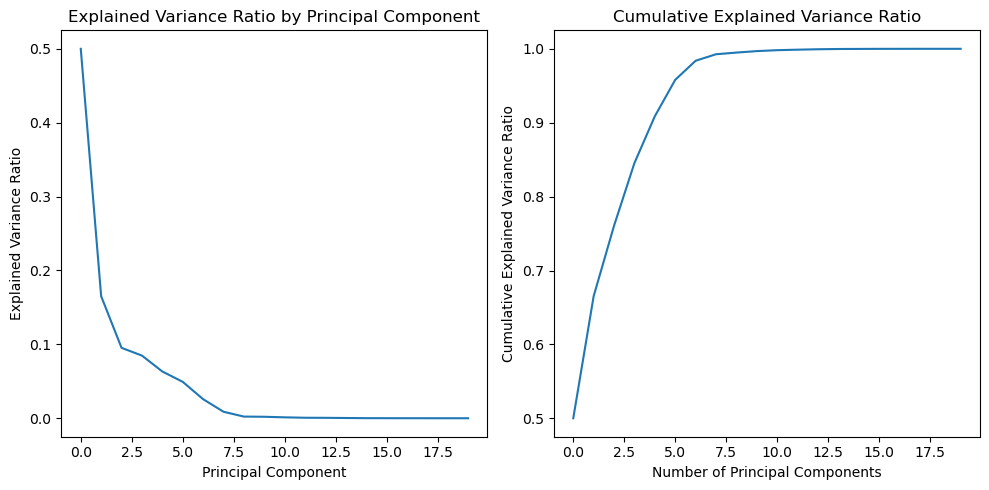

Number of dimensions required to explain 95.00% variance: 6


In [9]:
from sklearn.decomposition import PCA
# Perform PCA for dimensionality reduction
num_components = min(image_data.shape[0], image_data.shape[1])  # Number of components is min(samples, features)
pca = PCA(n_components=num_components)
pca.fit(image_data)

# Visualize explained variance of each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

# Analyze how many dimensions are required to adequately represent the data
explained_variance_threshold = 0.95  # Set a threshold for explained variance
num_dimensions_required = np.argmax(cumulative_variance >= explained_variance_threshold) + 1

print(f'Number of dimensions required to explain {explained_variance_threshold * 100:.2f}% variance: {num_dimensions_required}')


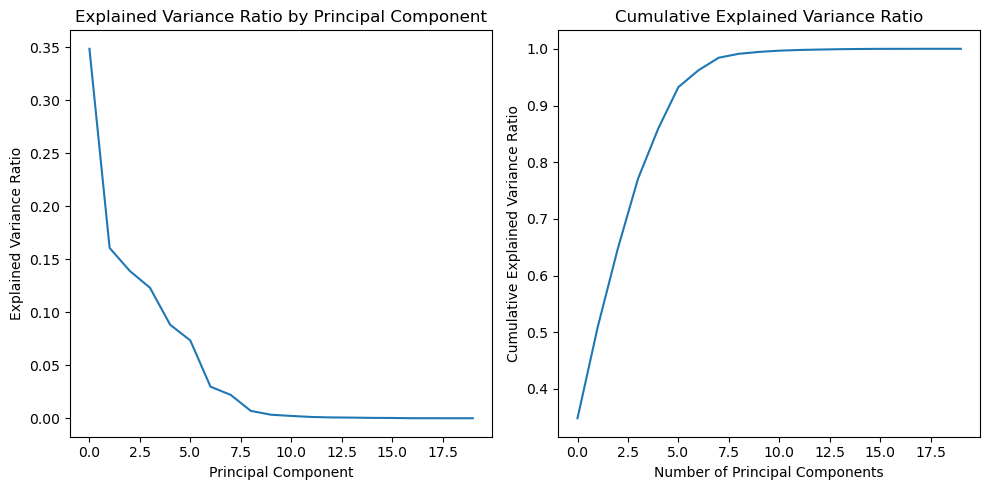

Number of dimensions required to explain 95.00% variance: 7


In [11]:
from sklearn.preprocessing import StandardScaler

# Perform data standardization
scaler = StandardScaler()
image_data_scaled = scaler.fit_transform(image_data)

# Perform Randomized Principal Component Analysis (RPCA)
n_components = min(image_data_scaled.shape[0], image_data_scaled.shape[1])  # Number of components is min(samples, features)
rpca = PCA(n_components=n_components, svd_solver='randomized')
rpca.fit(image_data_scaled)

# Visualize explained variance of each component
explained_variance_ratio = rpca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

# Analyze how many dimensions are required to adequately represent the data
explained_variance_threshold = 0.95  # Set a threshold for explained variance
num_dimensions_required = np.argmax(cumulative_variance >= explained_variance_threshold) + 1

print(f'Number of dimensions required to explain {explained_variance_threshold * 100:.2f}% variance: {num_dimensions_required}')


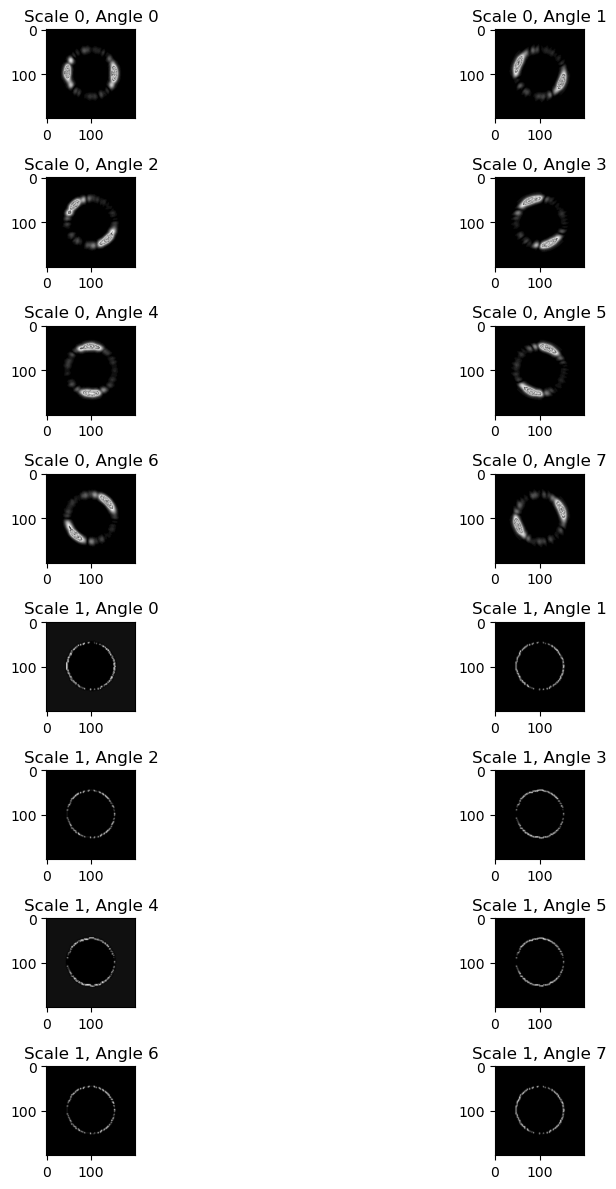

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, img_as_ubyte  # Import img_as_ubyte
from scipy import ndimage as ndi

# Set the parent folder path containing subfolders for each shape's dataset
parent_folder = 'C:\\Users\\Lucifer\\Desktop\\ML_project\\Lab2\\CS7324fall23\\lab2\\shape dataset\\shapes'

# Function to read and preprocess the images using scikit-image
def preprocess_images(parent_folder, num_samples_per_shape=5):
    image_data = []
    image_labels = []
    
    for shape_folder in os.listdir(parent_folder):
        shape_folder_path = os.path.join(parent_folder, shape_folder)
        if os.path.isdir(shape_folder_path):
            shape_name = shape_folder.lower()  # Get the shape name from the folder
            sample_count = 0  # Counter for the number of samples per shape
            for image_file in os.listdir(shape_folder_path):
                if sample_count >= num_samples_per_shape:
                    break  # Limit the number of samples per shape
                if image_file.endswith(('.png')):  # Check if it's an image file
                    image_path = os.path.join(shape_folder_path, image_file)
                    img = io.imread(image_path, as_gray=True)  # Read and convert to grayscale
                    img_data = img_as_ubyte(img)  # Convert to 8-bit (0-255) representation
                    image_data.append(img_data)  # Append image data
                    image_labels.append(shape_name)  # Append the shape name as a label
                    sample_count += 1  # Increment the sample count
    
    return np.array(image_data), np.array(image_labels)

# Read and preprocess the images
image_data, image_labels = preprocess_images(parent_folder, num_samples_per_shape=5)

# Define Gabor filter parameters
orientations = 8  # Number of filter orientations
scales = [0.1, 0.5]  # List of filter scales

# Function to compute Gabor filter features for an image
def compute_gabor_features(image, orientations, scales):
    gabor_features = []
    for scale in scales:
        for angle in range(orientations):
            gabor_filter_real, gabor_filter_imag = filters.gabor(image, frequency=scale, theta=(angle / orientations) * np.pi)
            gabor_magnitude = np.sqrt(gabor_filter_real**2 + gabor_filter_imag**2)
            gabor_features.append(gabor_magnitude)
    return np.array(gabor_features)

# Compute Gabor features for each image
gabor_features_list = []
for img_data in image_data:
    gabor_features = compute_gabor_features(img_data, orientations, scales)
    gabor_features_list.append(gabor_features)

# Visualize Gabor filter response for one image (for illustration)
sample_image_index = 0  # Change this index to visualize features for different images
plt.figure(figsize=(12, 12))
for i, gabor_response in enumerate(gabor_features_list[sample_image_index]):
    plt.subplot(orientations, len(scales), i + 1)
    plt.imshow(gabor_response, cmap='gray')
    plt.title(f'Scale {i // orientations}, Angle {i % orientations}')
plt.tight_layout()
plt.show()

# Now, `gabor_features_list` contains the Gabor filter features for each image.


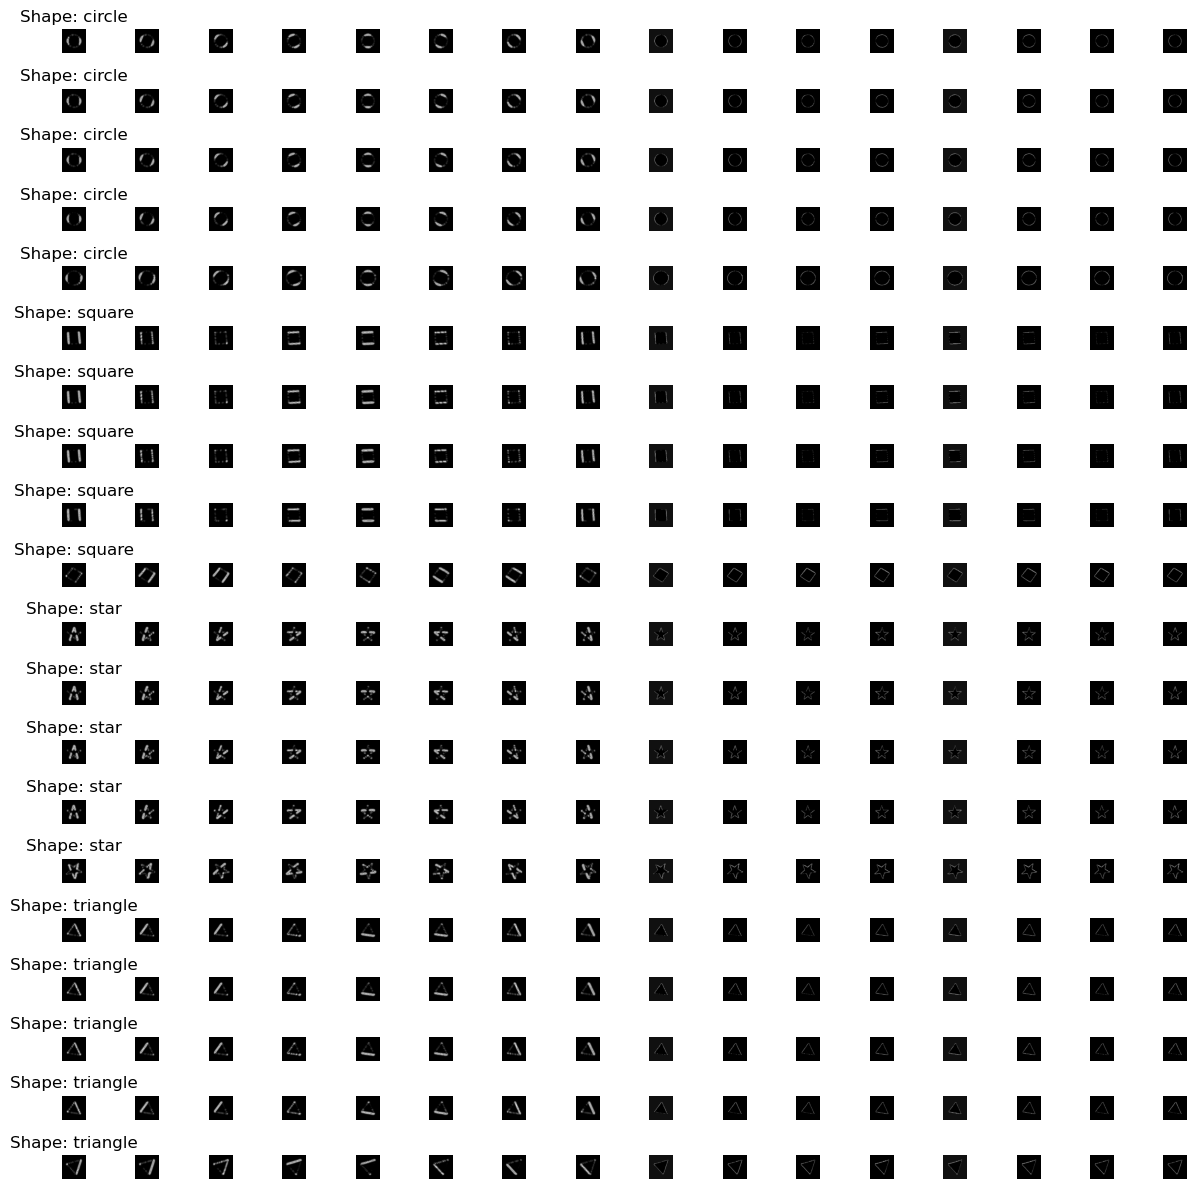

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, img_as_ubyte  # Import img_as_ubyte
from scipy import ndimage as ndi

# Set the parent folder path containing subfolders for each shape's dataset
parent_folder = 'C:\\Users\\Lucifer\\Desktop\\ML_project\\Lab2\\CS7324fall23\\lab2\\shape dataset\\shapes'

# Function to read and preprocess the images using scikit-image
def preprocess_images(parent_folder, num_samples_per_shape=5):
    image_data = []
    image_labels = []
    
    for shape_folder in os.listdir(parent_folder):
        shape_folder_path = os.path.join(parent_folder, shape_folder)
        if os.path.isdir(shape_folder_path):
            shape_name = shape_folder.lower()  # Get the shape name from the folder
            sample_count = 0  # Counter for the number of samples per shape
            for image_file in os.listdir(shape_folder_path):
                if sample_count >= num_samples_per_shape:
                    break  # Limit the number of samples per shape
                if image_file.endswith(('.jpg', '.jpeg', '.png')):  # Check if it's an image file
                    image_path = os.path.join(shape_folder_path, image_file)
                    img = io.imread(image_path, as_gray=True)  # Read and convert to grayscale
                    img_data = img_as_ubyte(img)  # Convert to 8-bit (0-255) representation
                    image_data.append(img_data)  # Append image data
                    image_labels.append(shape_name)  # Append the shape name as a label
                    sample_count += 1  # Increment the sample count
    
    return np.array(image_data), np.array(image_labels)

# Read and preprocess the images
image_data, image_labels = preprocess_images(parent_folder, num_samples_per_shape=5)

# Define Gabor filter parameters
orientations = 8  # Number of filter orientations
scales = [0.1, 0.5]  # List of filter scales

# Function to compute Gabor filter features for an image
def compute_gabor_features(image, orientations, scales):
    gabor_features = []
    for scale in scales:
        for angle in range(orientations):
            gabor_filter_real, gabor_filter_imag = filters.gabor(image, frequency=scale, theta=(angle / orientations) * np.pi)
            gabor_magnitude = np.sqrt(gabor_filter_real**2 + gabor_filter_imag**2)
            gabor_features.append(gabor_magnitude)
    return np.array(gabor_features)

# Compute Gabor features and visualize responses for all images
plt.figure(figsize=(12, 12))

for image_index, img_data in enumerate(image_data):
    gabor_features = compute_gabor_features(img_data, orientations, scales)
    
    # Visualize Gabor filter responses for the current image
    for i, gabor_response in enumerate(gabor_features):
        plt.subplot(len(image_data), orientations * len(scales), image_index * (orientations * len(scales)) + i + 1)
        plt.imshow(gabor_response, cmap='gray')
        plt.axis('off')  # Turn off axis labels
        if i == 0:
            plt.title(f'Shape: {image_labels[image_index]}')

plt.tight_layout()
plt.show()
